In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from statistics import mode 

In [2]:
class Region: 
    # Data of World, Asia, Africa, Europe, Oceania, North America, South America
    world = asia = africa = europe = oceania = north_america = south_america = ''
    countries_asia = []             # Data of all countries in Asia
    countries_africa = []           # Data of all countries in Africa
    countries_europe = []           # Data of all countries in Europe
    countries_oceania = []          # Data of all countries in Oceania
    countries_north_america = []    # Data of all countries in North America
    countries_south_america = []    # Data of all countries in South America
    countries_other = []            # Data of other countries
    all_countries = []              # Data of all countries in the World

    def set_all_countries(self):
        self.all_countries = (self.countries_asia + self.countries_africa + self.countries_europe + self.countries_north_america + self.countries_south_america + self.countries_oceania + self.countries_other)

In [3]:
def open_file(csv_file: str, rg: Region, header: list):

    with open(csv_file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            if row[0] == "Country, Other": # Header
                header += row
                continue
            
            for i in range(1, 14):
                if row[i] == "" or row[i] == "N/A": 
                    row[i] = 0 # Replace empty values with 0
                else:
                    try:
                        # Convert number in data from string to float
                        row[i] = row[i].replace(',', '') 
                        row[i] = float(row[i])
                    except:
                        pass
                    
            # Assign data 
            if row[0] == "World":
                rg.world = row
            elif row[14] == "Asia":
                if row[0] == "Asia":
                    rg.asia = row
                else:
                    rg.countries_asia.append(row)
            elif row[14] == "Europe":
                if row[0] == "Europe":
                    rg.europe = row
                else:
                    rg.countries_europe.append(row)
            elif row[14] == "North America":
                if row[0] == "North America":
                    rg.north_america = row
                else:
                    rg.countries_north_america.append(row)
            elif row[14] == "South America":
                if row[0] == "South America":
                    rg.south_america = row
                else:
                    rg.countries_south_america.append(row)
            elif row[14] == "Africa":
                if row[0] == "Africa":
                    rg.africa = row
                else:
                    rg.countries_africa.append(row)
            elif row[14] == "Australia/Oceania":
                if row[0] == "Oceania":
                    rg.oceania = row
                else:
                    rg.countries_oceania.append(row)
            elif row[14] == "":
                if not row[0] == "":
                    rg.countries_other.append(row)

In [4]:
def check_total(rg: Region):

    # Check the differences between the total of continents's data and the world's data
    ## Initial array
    sum = [0 for i in range(0,9)] 

    ## Calculate the sum of data
    for i in range(1, 9):
        sum[i] = rg.asia[i]+rg.africa[i]+rg.europe[i]+rg.oceania[i]+rg.north_america[i]+rg.south_america[i]
        for location in rg.countries_other:
            sum[i]+=location[i]

    ## Check data
    print('Continents - World')
    for i in range(1, 9):
        if sum[i]==rg.world[i]:
            print(f"\t{header[i]}: Same")
        else:
            print(f"\t{header[i]}: Different")

    # Check the differences between the total of countries's data in particular continent and their continent's data
    ## Initial array
    sum_asia = [0 for i in range(0,9)]
    sum_africa = [0 for i in range(0,9)]
    sum_europe = [0 for i in range(0,9)]
    sum_oceania = [0 for i in range(0,9)]
    sum_north_america = [0 for i in range(0,9)]
    sum_south_america = [0 for i in range(0,9)]

    ## Calculate the sum of data
    for i in range(1, 9):
        for country in rg.countries_asia:
            sum_asia[i] += country[i]
        for country in rg.countries_africa:
            sum_africa[i] += country[i]
        for country in rg.countries_europe:
            sum_europe[i] += country[i]
        for country in rg.countries_oceania:
            sum_oceania[i] += country[i]
        for country in rg.countries_north_america:
            sum_north_america[i] += country[i]
        for country in rg.countries_south_america:
            sum_south_america[i] += country[i]

    ## Check data
    print('Countries - Continent')
    for i in range(1, 9):
        flag = True
        if not sum_asia[i]==rg.asia[i]:
            print(header[i])
            print('\tAsia: Different')
            flag = False
        if not sum_africa[i]==rg.africa[i]:
            if flag:
                print(header[i])
                flag = False
            print('\tAfrica: Different')
        if not sum_europe[i]==rg.europe[i]: 
            if flag:
                print(header[i])
                flag = False
            print('\tEurope: Different')
        if not sum_oceania[i]==rg.oceania[i]: 
            if flag:
                print(header[i])
                flag = False
            print('\tOceania/Australia: Different')
        if not sum_north_america[i]==rg.north_america[i]:
            if flag:
                print(header[i])
                flag = False
            print('\tNorth America: Different')
        if not sum_south_america[i]==rg.south_america[i]:
            if flag:
                print(header[i])
                flag = False
            print('\tSouth America: Different')


In [5]:
region = Region()
header = []
open_file('03-12-2021 raw.csv', region, header)
region.set_all_countries()
check_total(region)

Continents - World
	Total cases: Same
	New cases: Same
	Total deaths: Same
	New deaths: Same
	Total recovered: Same
	New recovered: Same
	Active cases: Same
	Serious, Critical: Same
Countries - Continent
Total recovered
	Africa: Different
	Oceania/Australia: Different
	North America: Different
	South America: Different
Active cases
	Africa: Different
	Oceania/Australia: Different
	North America: Different
	South America: Different


In [22]:
def histogram(index: int):
    # Get the array with specified index
    arr = np.array(region.all_countries)[:,index].astype(float)

    plt.figure(figsize=(12,8))
    plt.hist(arr, color="skyblue")
    plt.xlabel(header[index], labelpad=15)
    plt.ylabel("Frequency", labelpad=15)
    plt.title(f"Distribution of {header[index]}", y=1.012, fontsize=22)
    measurements = [mode(arr), np.median(arr), np.mean(arr)]
    names = ["mode", "median", "mean"]
    colors = ['green', 'blue', 'orange']
    for measurement, name, color in zip(measurements, names, colors):
        plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
    plt.legend()

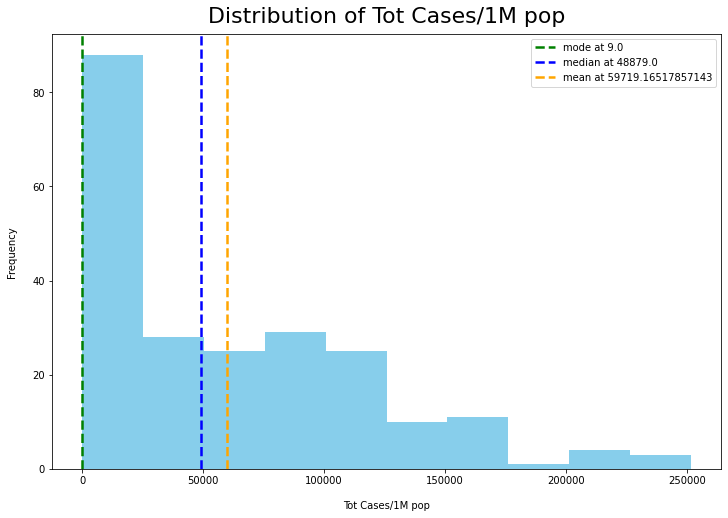

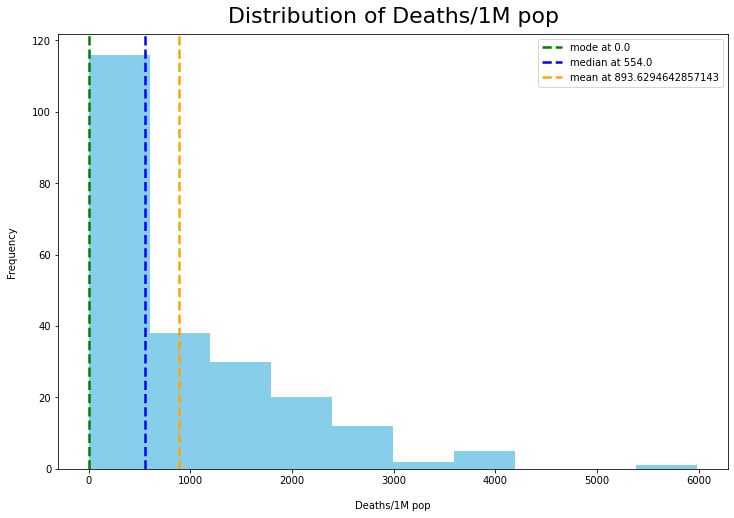

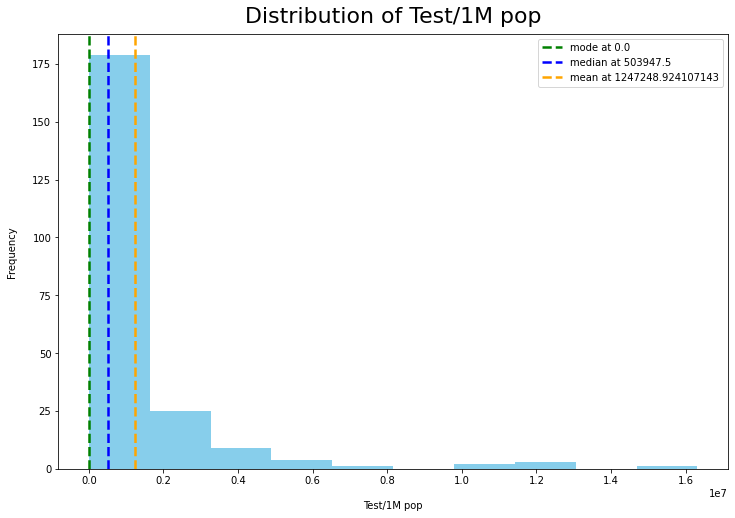

In [23]:
for i in [9,10,12]:
    histogram(i)

In [24]:
def scatter_plot(x_idx: int, y_idx: int, color: list):
    asia = np.array(region.countries_asia)[:,[x_idx, y_idx]].astype(float)
    africa = np.array(region.countries_africa)[:,[x_idx, y_idx]].astype(float)
    europe = np.array(region.countries_europe)[:,[x_idx, y_idx]].astype(float)
    north_america = np.array(region.countries_north_america)[:,[x_idx, y_idx]].astype(float)
    south_america = np.array(region.countries_south_america)[:,[x_idx, y_idx]].astype(float)
    oceania = np.array(region.countries_oceania)[:,[x_idx, y_idx]].astype(float)
    other = np.array(region.countries_other)[:,[x_idx, y_idx]].astype(float)

    plt.figure(figsize=(17,12))
    if not color[0] == color[1]: # If you need to classified each continent
        plt.title(f'Relationship between: {header[y_idx]} - {header[x_idx]} - Continent', y=1.012, fontsize=22)
    else:
        plt.title(f'Relationship between: {header[y_idx]} - {header[x_idx]}', y=1.012, fontsize=22)
    plt.xlabel(header[x_idx])
    plt.ylabel(header[y_idx])
    
    plt.xscale(value='log')
    plt.yscale(value='log')

    plt.scatter(asia[:,0], asia[:,1], color=color[0], label="Asia", s=100)
    plt.scatter(africa[:,0], africa[:,1], color=color[1], label="Africa", s=100)
    plt.scatter(europe[:,0], europe[:,1], color=color[2], label="Europe", s=100)
    plt.scatter(north_america[:,0], north_america[:,1], color=color[3], label="North America", s=100)
    plt.scatter(south_america[:,0], south_america[:,1], color=color[4], label="South America", s=100)
    plt.scatter(oceania[:,0], oceania[:,1], color=color[5], label="Oceania/Australia", s=100)
    plt.scatter(other[:,0], other[:,1], color=color[6], label="Other", s=100)

    if not color[0] == color[1]: # If you need to classified each continent
        plt.legend()

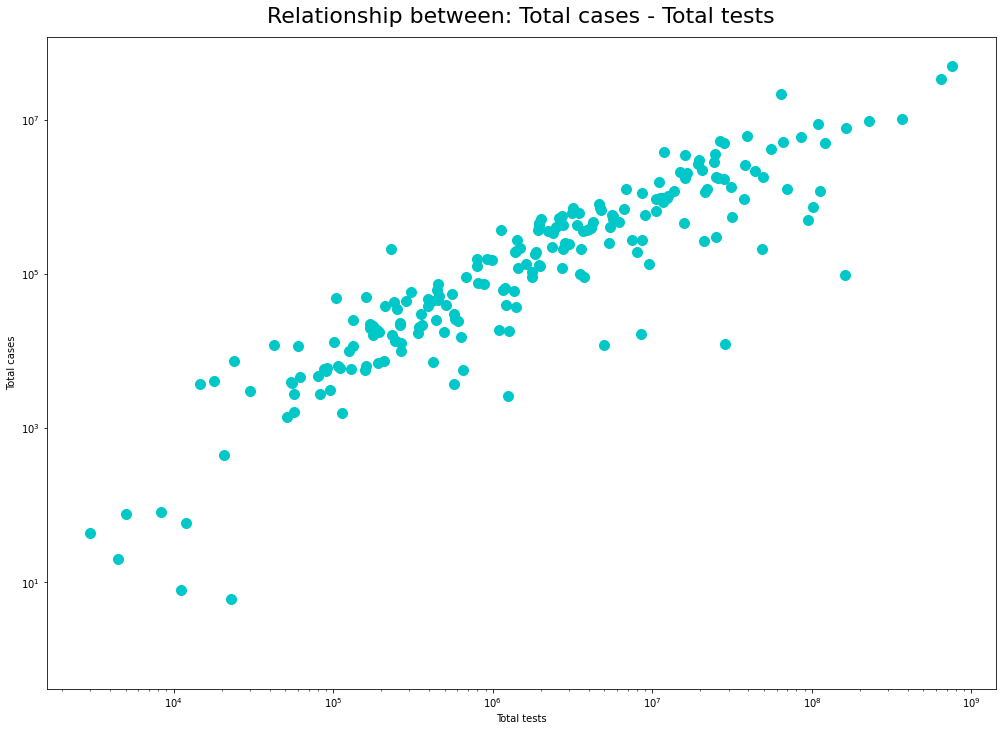

In [25]:
scatter_plot(11,1,["#00c8c8" for i in range(7)])

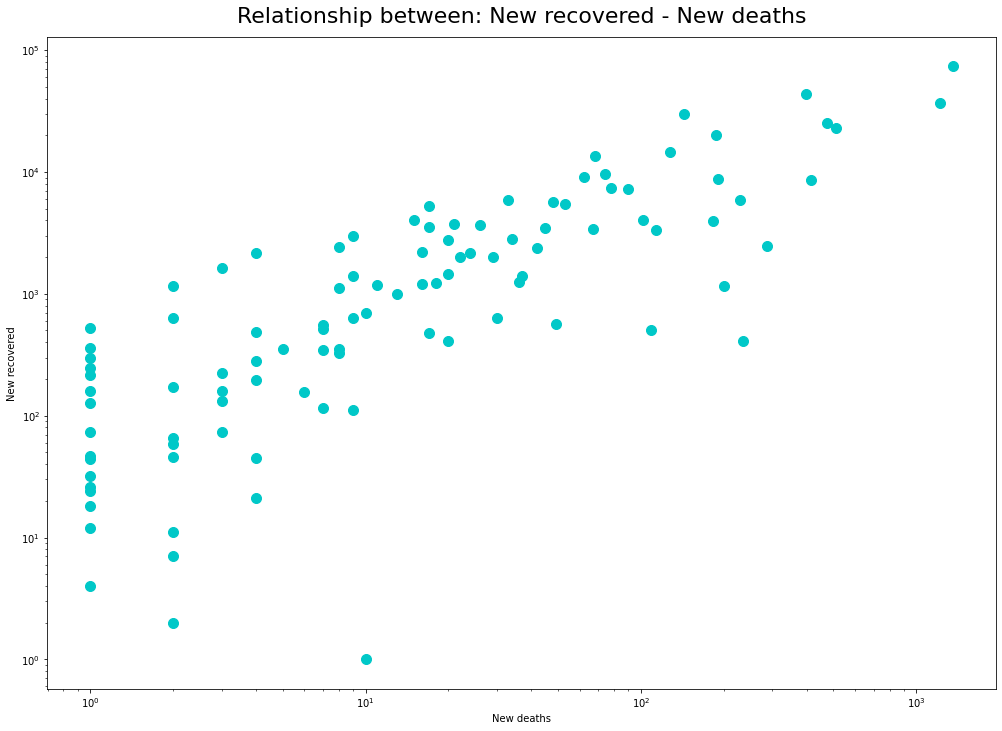

In [26]:
scatter_plot(4,6,["#00c8c8" for i in range(7)])

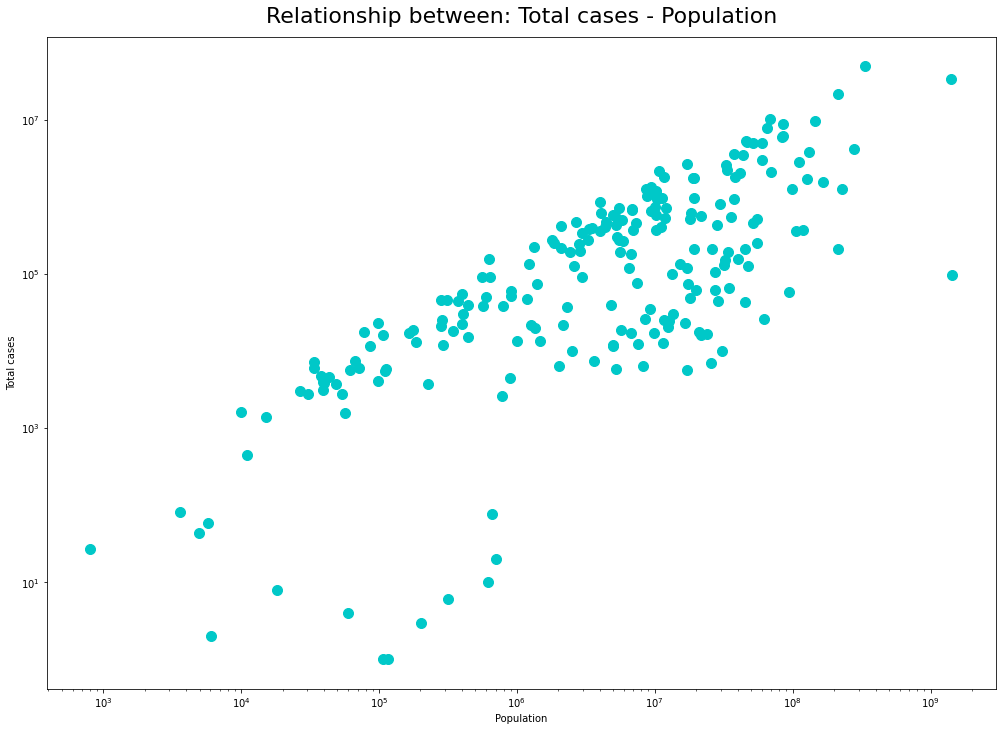

In [27]:
scatter_plot(13,1,["#00c8c8" for i in range(7)])

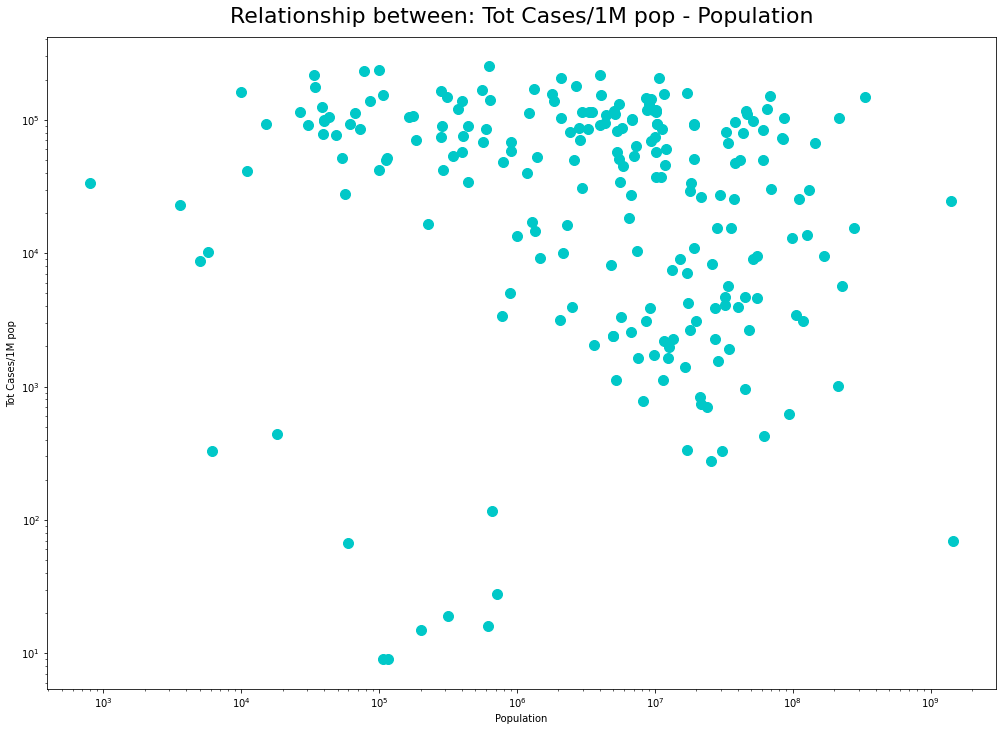

In [12]:
scatter_plot(13,9,["#00c8c8" for i in range(7)])

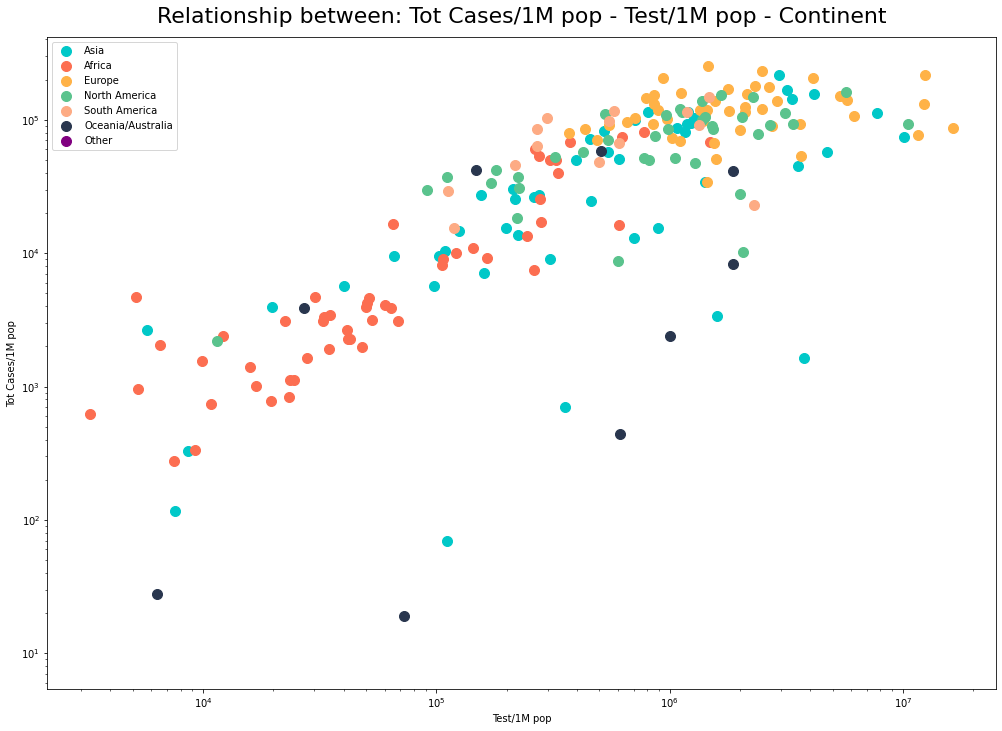

In [13]:
scatter_plot(12,9,["#00c8c8","#fc6e51","#ffb247","#5AC38D","#fdab84","#29364e","purple"])

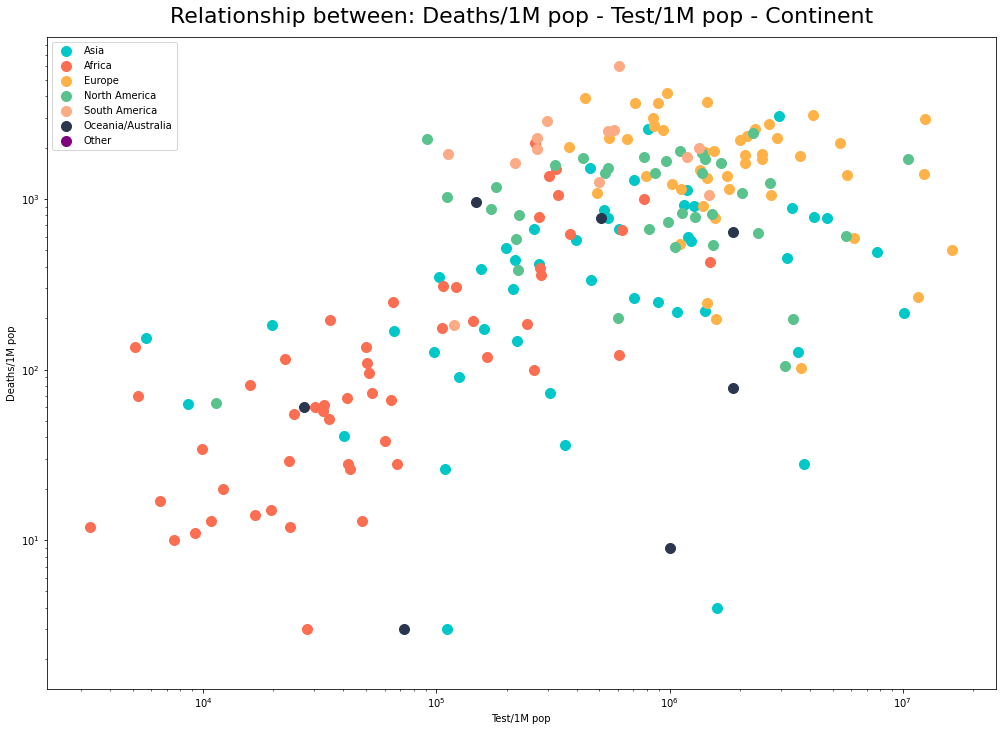

In [14]:
scatter_plot(12,10,["#00c8c8","#fc6e51","#ffb247","#5AC38D","#fdab84","#29364e","purple"])

In [15]:
def ratio_hor_bar_chart(id1: int, id2: int, name: str):
    dic = {}
    dic['Asia'] = region.asia[id1]/region.asia[id2]
    dic['Africa'] = region.africa[id1]/region.africa[1]
    dic['Europe'] = region.europe[id1]/region.europe[1]
    dic['North America'] = region.north_america[id1]/region.north_america[1]
    dic['South America'] = region.south_america[id1]/region.south_america[1]
    dic['Oceania/Australia'] = region.oceania[id1]/region.oceania[1]
    sorted_dic = sorted(dic.items(), key=lambda x: x[1])

    plt.figure(figsize=(12,8))
    plt.barh(np.array(sorted_dic)[:,0], np.array(sorted_dic)[:,1].astype(float), align='center')

    plt.xlabel(f'{header[id1]}/{header[id2]}')
    plt.ylabel('Continent')
    plt.title(name, y=1.012, fontsize=22)

    plt.show()

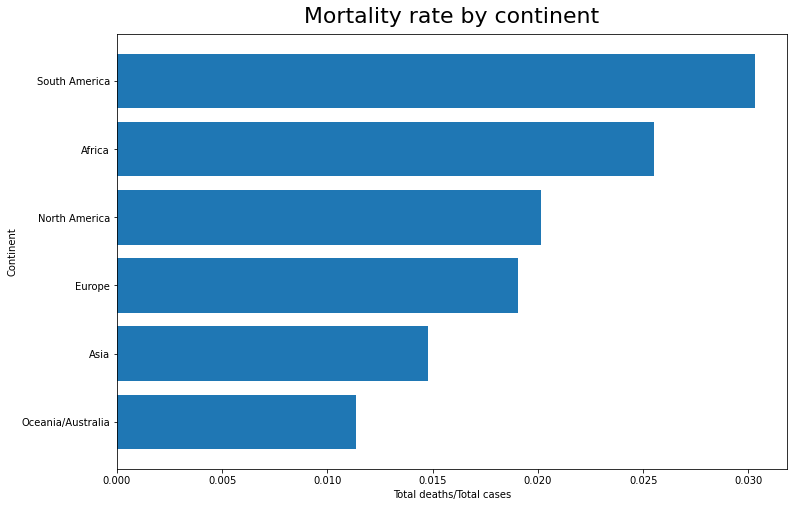

In [16]:
ratio_hor_bar_chart(3,1,'Mortality rate by continent')

In [17]:
def grouped_ver_bar_chart(lst_id: list, name: str):
    index = np.arange(len(lst_id))
    bar_width = 0.1275

    fig, ax = plt.subplots()
    fig.set_size_inches(18, 12)
    
    ax.bar(index, [region.asia[i] for i in lst_id], bar_width, label="Asia", color="#00c8c8")
    ax.bar(index+bar_width, [region.africa[i] for i in lst_id], bar_width, label="Africa", color="#fc6e51")
    ax.bar(index+bar_width*2, [region.europe[i] for i in lst_id], bar_width, label="Europe", color="#ffb247")
    ax.bar(index+bar_width*3, [region.north_america[i] for i in lst_id], bar_width, label="North America", color="#5AC38D")
    ax.bar(index+bar_width*4, [region.south_america[i] for i in lst_id], bar_width, label="South America", color="#fdab84")
    ax.bar(index+bar_width*5, [region.oceania[i] for i in lst_id], bar_width, label="Oceania/Australia", color="#29364e")

    ax.set_xlabel('Category')
    ax.set_ylabel('Incidence')
    ax.set_title(name, y=1.012, fontsize=22)
    ax.set_xticks(index + bar_width*5/2)
    ax.set_xticklabels([header[i] for i in lst_id])
    ax.legend()

    plt.show()

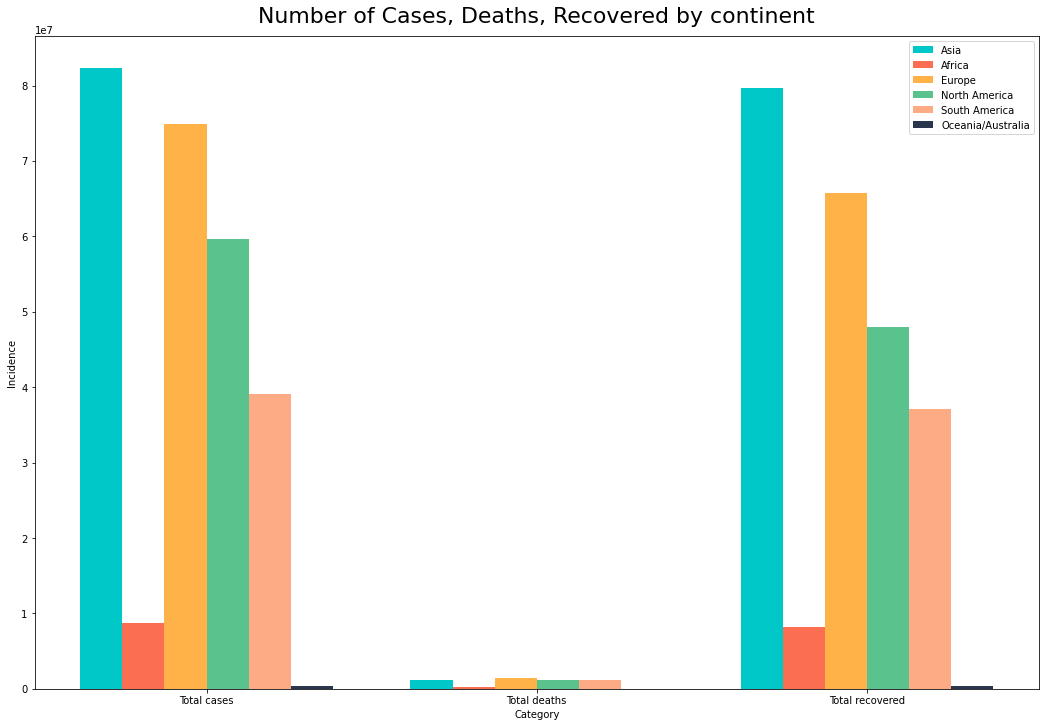

In [18]:
grouped_ver_bar_chart([1,3,5], 'Number of Cases, Deaths, Recovered by continent')

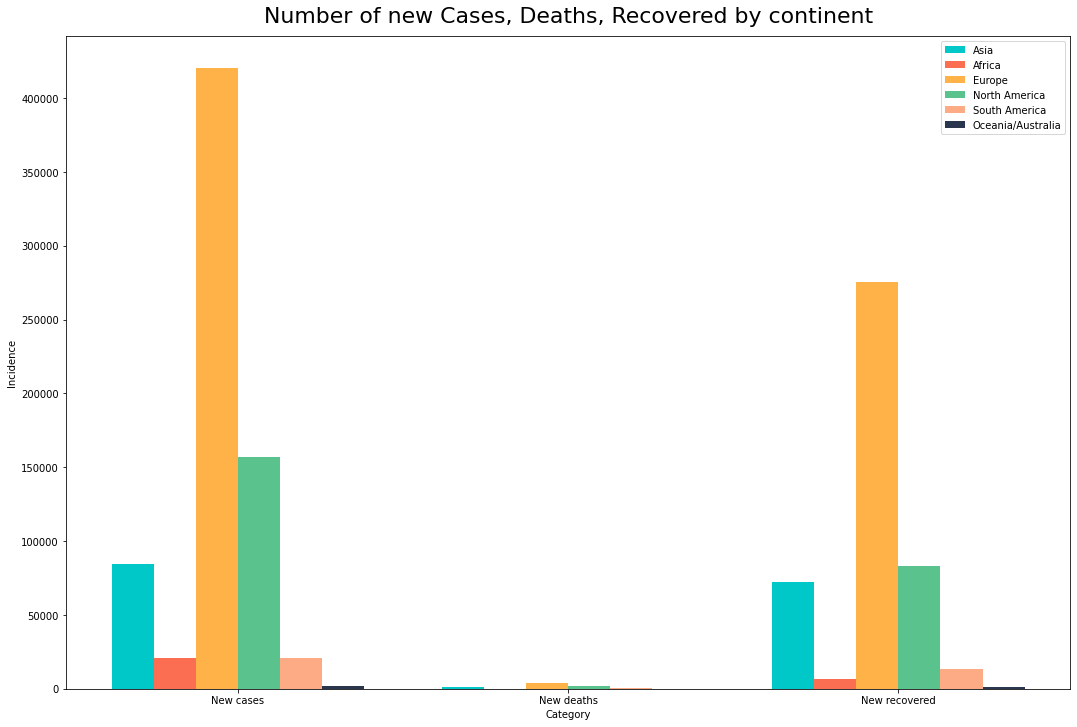

In [19]:
grouped_ver_bar_chart([2,4,6], 'Number of new Cases, Deaths, Recovered by continent')

In [20]:
def stacked_ver_bar_chart(lst_id: list, name: str):
    index = np.arange(6)
    bar_width = 0.3

    fig, ax = plt.subplots()
    fig.set_size_inches(18, 12)

    ax.bar(index, [region.asia[lst_id[0]],region.africa[lst_id[0]],region.europe[lst_id[0]],region.north_america[lst_id[0]],region.south_america[lst_id[0]],region.oceania[lst_id[0]]], bar_width, label=header[lst_id[0]], color="#29364e")

    ax.bar(index, [region.asia[lst_id[1]], region.africa[lst_id[1]], region.europe[lst_id[1]],region.north_america[lst_id[1]], region.south_america[lst_id[1]], region.oceania[lst_id[1]]], bar_width, bottom=[region.asia[lst_id[0]],region.africa[lst_id[0]],region.europe[lst_id[0]],region.north_america[lst_id[0]],region.south_america[lst_id[0]],region.oceania[lst_id[0]]],label=header[lst_id[1]], color="#ffb247")

    ax.bar(index, [region.asia[lst_id[2]], region.africa[lst_id[2]], region.europe[lst_id[2]], region.north_america[lst_id[2]], region.south_america[lst_id[2]], region.oceania[lst_id[2]]], bar_width, bottom=[region.asia[lst_id[0]]+region.asia[lst_id[1]],region.africa[lst_id[0]]+region.africa[lst_id[1]],region.europe[lst_id[0]]+region.europe[lst_id[1]],region.north_america[lst_id[0]]+region.north_america[lst_id[1]],region.south_america[lst_id[0]]+region.south_america[lst_id[1]],region.oceania[lst_id[0]]+region.oceania[lst_id[1]]],label=header[lst_id[2]], color="#5AC38D")

    ax.set_xlabel('Category')
    ax.set_ylabel('Number of cases')
    ax.set_title(name, y=1.012, fontsize=22)
    ax.set_xticks(index)
    ax.set_xticklabels(["Asia", "Africa", "Europe", "North America", "South America", "Oceania/Australia"])
    ax.legend()

    plt.show()

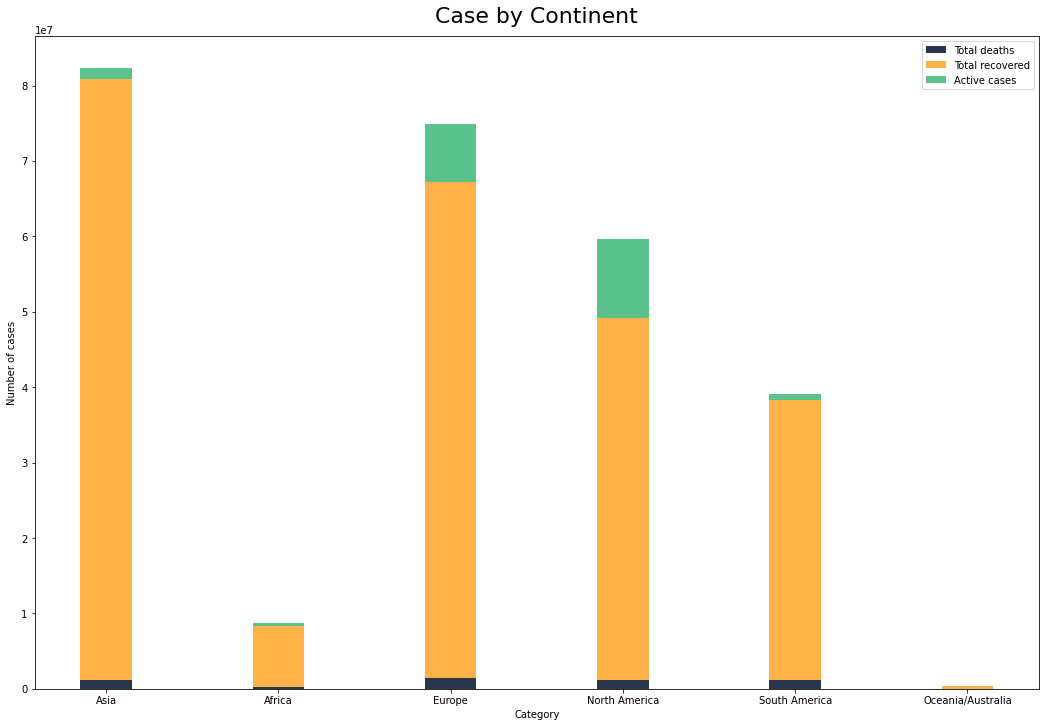

In [21]:
stacked_ver_bar_chart([3,5,7],"Case by Continent")